#House Price Prediction - Advanced regression Assignment
--------------------------------------------------------
- Problem Statement :<rb>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
<br>


- The solution is divided into the following sections:

        1. Data understanding and exploration
        2. Data cleaning
        3. Data visulization
        4. Data preparation
        5. Model building and evaluation
        6. Observation

#  1. Data understanding and exploration

In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [445]:
data= pd.read_csv("/content/train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [446]:
data.shape

(1460, 81)

In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [448]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#2. Data cleaning( check for null values, outlier detection etc)

In [449]:
# Checking for percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [450]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
data.columns[data.isnull().any()] 

null = data.isnull().sum()/len(data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price

Hence, we will first impute the categorical variables with 'None

In [451]:
impute_null= ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in impute_null:
    data[i].fillna("none", inplace=True)


In [452]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,none,IR1,Lvl,AllPub,...,0,none,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,none,IR1,Lvl,AllPub,...,0,none,none,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,1,2008,WD,Normal,118000


In [453]:
# Check nulls once again
null=(data.isnull().sum()/len(data)*100)
null=null[null>0]
null

LotFrontage    17.739726
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64

In [454]:
#let see these all column seprately
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [455]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [456]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [457]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [458]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns
data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)


In [459]:
data.shape

(1460, 81)

In [460]:
# drop electrical beacause have less unique value
data["Electrical"].dropna(inplace=True)

All numeric (float and int) variables in the dataset

In [461]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [462]:
# Dropping ID Column beacuse it has no use
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


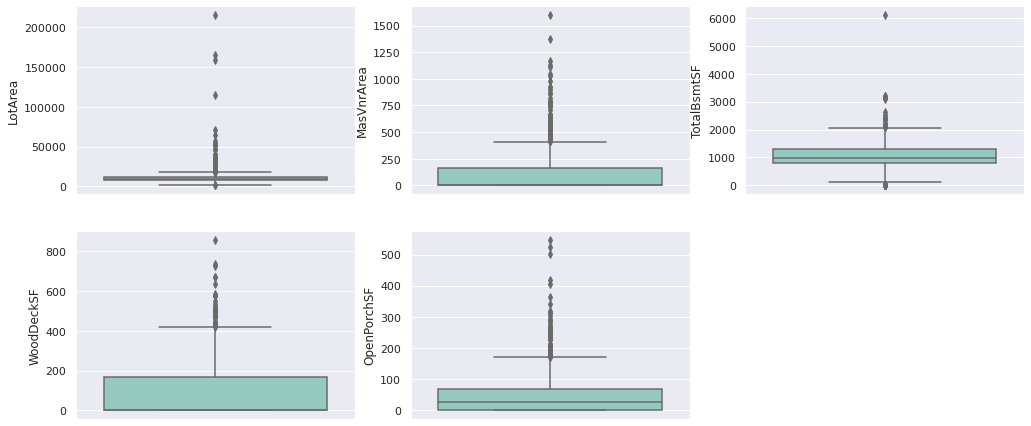

In [463]:
#outlier Detection
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = data)
plt.show()

In [464]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = data['LotArea'].quantile(0.98)
data = data[data["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = data['MasVnrArea'].quantile(0.98)
data = data[data["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = data['TotalBsmtSF'].quantile(0.99)
data = data[data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = data['WoodDeckSF'].quantile(0.99)
data = data[data["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = data['OpenPorchSF'].quantile(0.99)
data = data[data["OpenPorchSF"] < nn_quartile_OpenPorchSF]

#3. Data Visualisation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

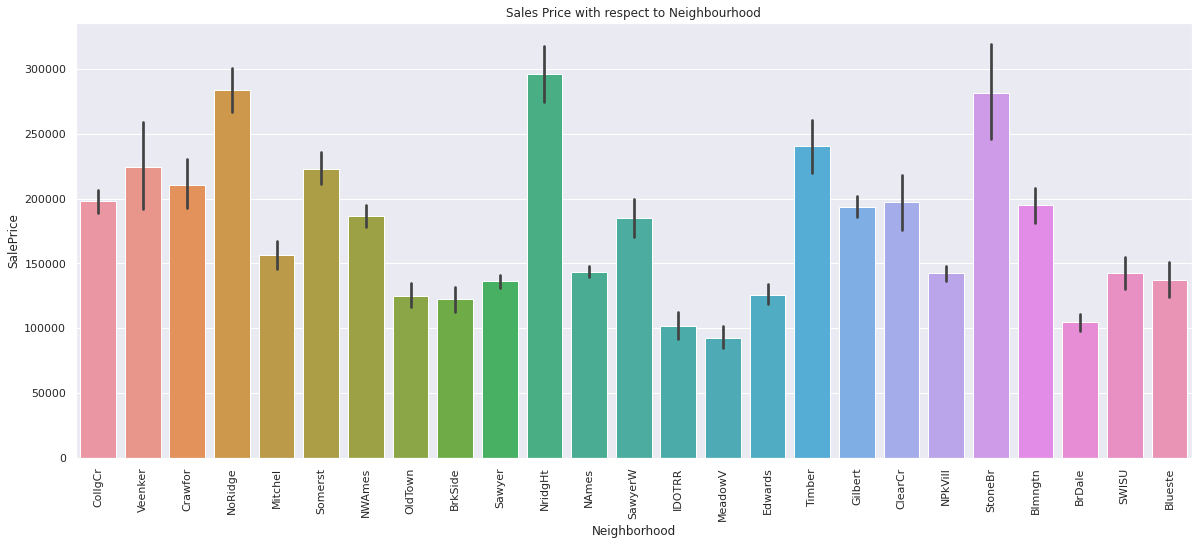

In [465]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


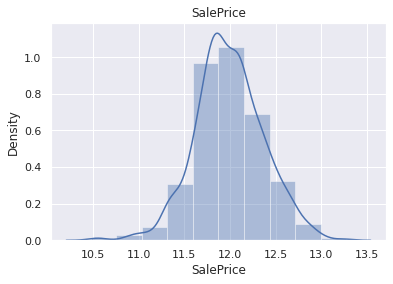

In [466]:
# plot the target variables

data['SalePrice'] = np.log1p(data['SalePrice'])

plt.title('SalePrice')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

In [467]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


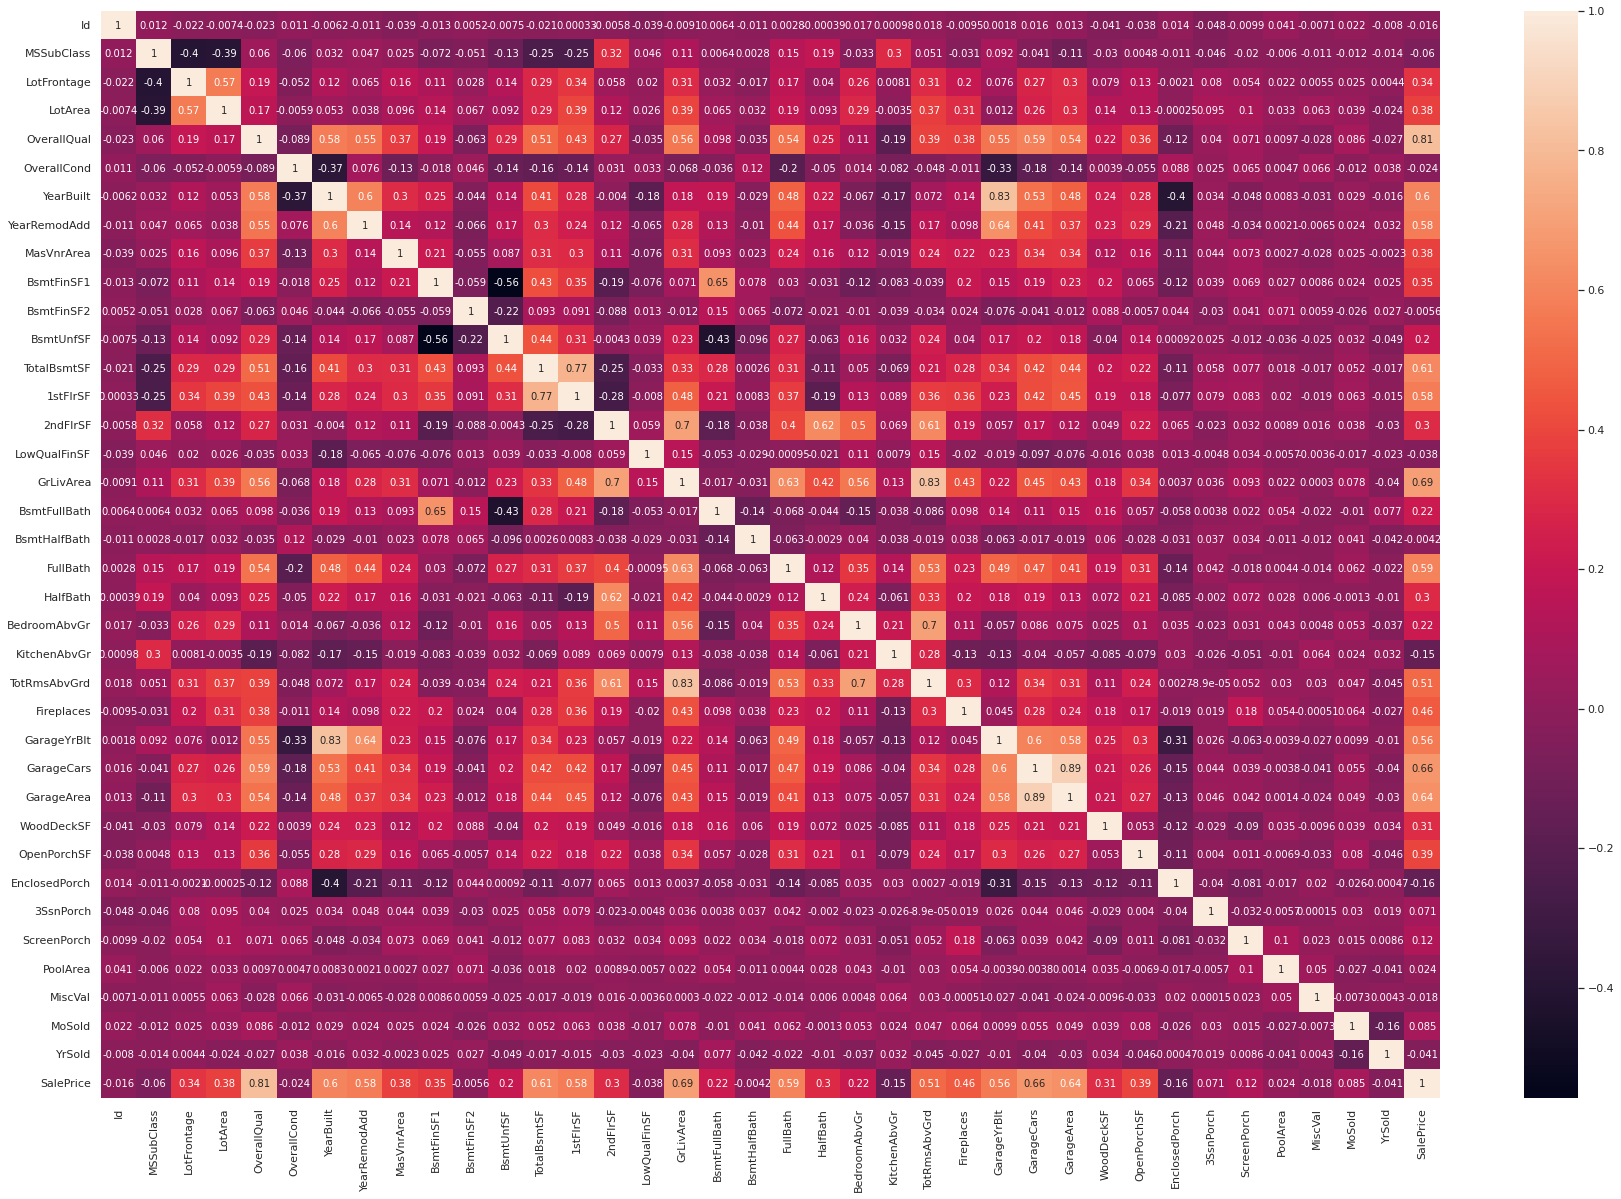

In [468]:
#correlation matrix
plt.figure(figsize = (30, 20))
sns.heatmap(data.corr(), annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


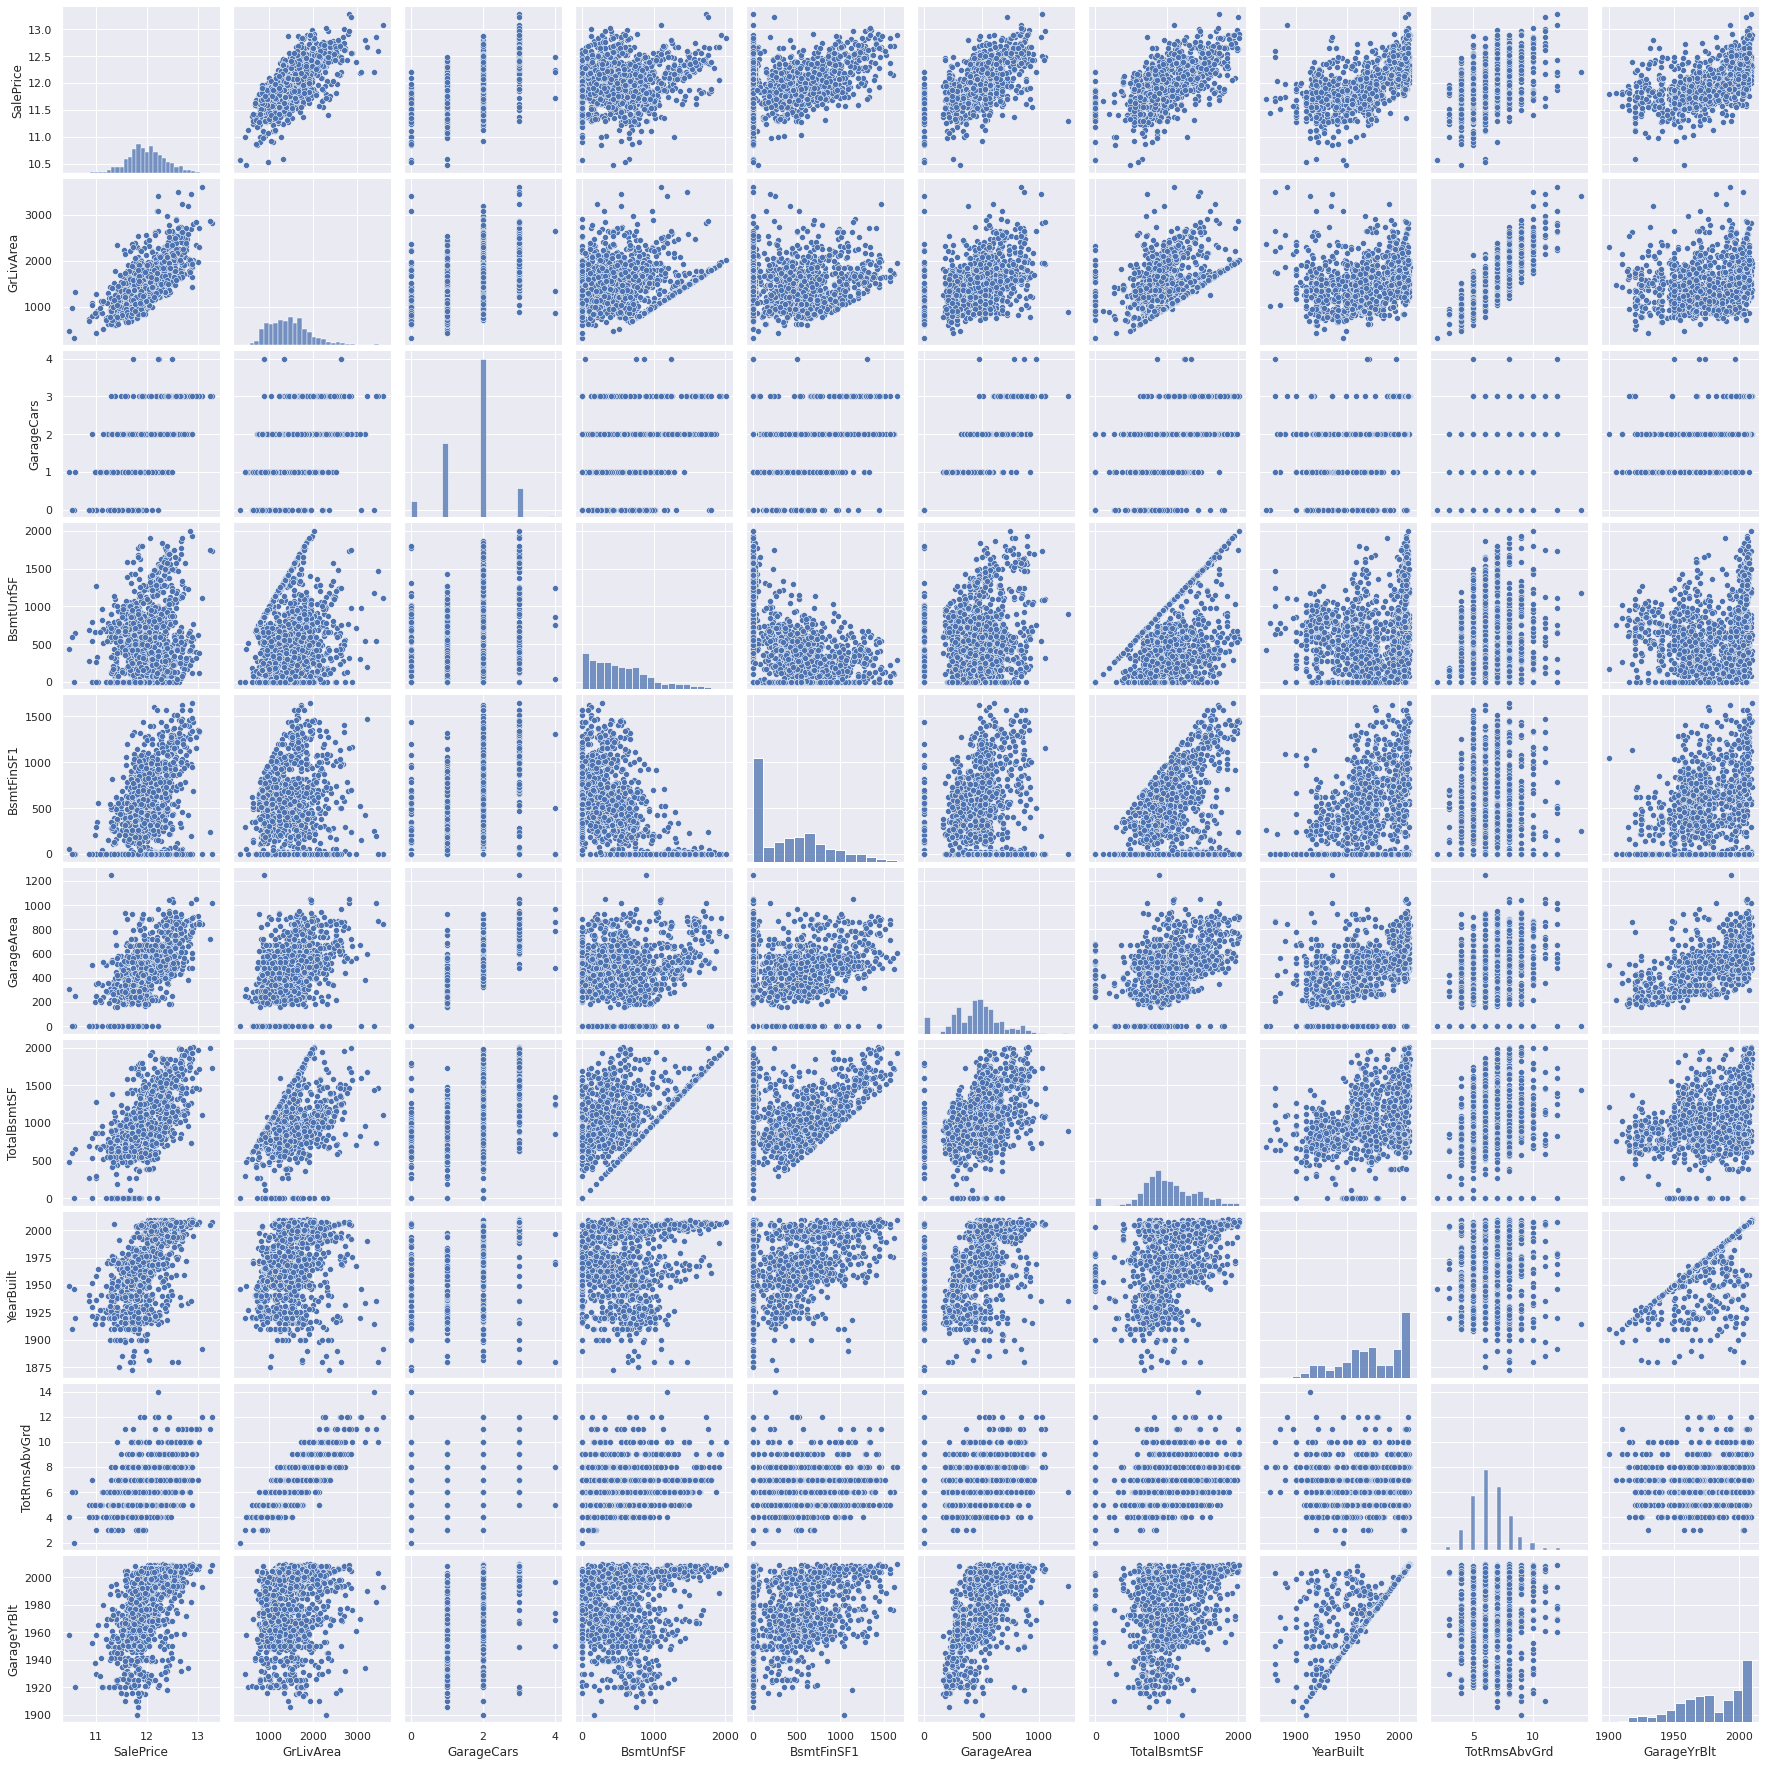

In [469]:
# we can see some variable are coorelated let visualise these variables 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

Drop columns that are correlated and not contributing to 'SalePrice'

In [470]:

data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    
data = data.drop(['Id'], axis = 1)   
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [471]:
#Numeric columns
data.select_dtypes(exclude=['object'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,113,0,0,0,0,0,10,2009,12.128117
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,12.493133


drive a column Propage by taking difference between yrsold and yearbuilt column

In [472]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


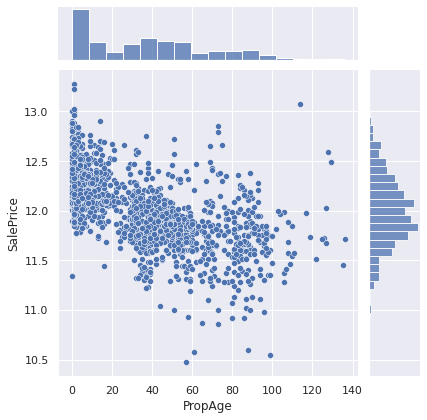

In [473]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

Observation: newer the property higher the rate

In [474]:
#Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required furthe
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,0,none,none,none,0,WD,Normal,12.429220,8


In [475]:
data.Street.value_counts()

Pave    1354
Grvl       4
Name: Street, dtype: int64

In [476]:
data.Utilities.value_counts()

AllPub    1357
NoSeWa       1
Name: Utilities, dtype: int64

In [477]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [478]:
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= data.select_dtypes(include=['float64', 'int64'])
l2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,548,0,61,0,0,0,0,0,12.247699,5
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,460,298,0,0,0,0,0,0,12.109016,31
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,608,0,42,0,0,0,0,0,12.317171,7
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,642,0,35,272,0,0,0,0,11.849405,91
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,0.0,410,0,1221,1221,...,400,0,113,0,0,0,0,0,12.128117,5
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,12.072547,8
1456,20,85.0,13175,6,6,119.0,790,163,1542,2073,...,500,349,0,0,0,0,0,0,12.254868,32
1457,70,66.0,9042,7,9,0.0,275,0,1152,1188,...,252,0,60,0,0,0,0,2500,12.493133,69


In [479]:
for i in l2:
    print(data[i].value_counts())

20     492
60     267
50     140
120     83
30      67
160     60
70      57
80      56
90      52
190     26
85      20
45      12
75      12
180     10
40       4
Name: MSSubClass, dtype: int64
69.0     244
60.0     137
70.0      68
80.0      66
50.0      56
        ... 
140.0      1
112.0      1
38.0       1
118.0      1
46.0       1
Name: LotFrontage, Length: 105, dtype: int64
7200     25
9600     23
6000     17
8400     14
10800    13
         ..
10637     1
11846     1
2500      1
10289     1
9717      1
Name: LotArea, Length: 988, dtype: int64
5     377
6     359
7     302
8     147
4     111
9      31
3      20
10      6
2       3
1       2
Name: OverallQual, dtype: int64
5    756
6    238
7    193
8     70
4     51
3     23
9     21
2      5
1      1
Name: OverallCond, dtype: int64
0.0      825
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
156.0      1
452.0      1
261.0      1
138.0      1
119.0      1
Name: MasVnrArea, Length: 284, dtype: int64
0       447

In [480]:
#these column have high null value after computing it is found that these column have less variance so drop it
data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [481]:
data.shape

(1358, 62)

#4. Data preparation


Creating Dummy columns to convert categorical into numerical

In [482]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [483]:
data.shape

(1358, 212)

In [484]:
X = data.drop(['SalePrice'], axis=1)


In [485]:
# Putting response variable to y
y = data['SalePrice']



In [486]:
#scale the feature
from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=211)

In [487]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [488]:
X_train.shape

(950, 211)

#5. Model Building and Evaluation

Build a Model using Linear Regression and RFE 

In [489]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
lm

LinearRegression()

In [490]:
# running RFE
n=50
rfe = RFE(lm,step=50)            
rfe = rfe.fit(X_train, y_train)

In [491]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 4),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 4),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 3),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 3),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', False, 4),
 ('LotShape_Reg', False, 2),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low', False, 3),
 (

In [492]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'MiscFeature_none', 'SaleType_ConLD', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Normal'],
      dtype='object', length=105)

In [493]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtHalfBath',
       'BedroomAbvGr', 'Fireplaces', 'OpenPorchSF', '3SsnPorch', 'PoolArea',
       ...
       'GarageFinish_RFn', 'GarageQual_Gd', 'PavedDrive_P', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleCondition_Family', 'SaleCondition_Partial'],
      dtype='object', length=106)

In [494]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = pd.DataFrame(X_train[col])

In [495]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
973,1.831643,2.256275,-0.526853,-0.428382,2.579957,2.542204,1.286949,-0.12167,3.001016,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,3.436760,-2.600000,-0.054353,-0.08613,-2.169305
1168,-0.883846,-0.017863,0.365250,0.022494,-0.354188,-0.495287,0.173497,-0.12167,-0.217675,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977
318,0.820250,-0.017863,1.257352,0.412442,0.522348,0.257470,-0.797204,-0.12167,-0.543619,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977
286,2.476211,0.740183,3.041556,-1.013304,1.197625,1.610079,3.528128,-0.12167,4.341244,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977
852,0.440978,-0.017863,2.149454,0.273523,0.440255,0.842620,-0.797204,-0.12167,-0.116890,1.157858,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977


In [496]:
X_train_rfe.shape

(950, 105)

In [497]:
from sklearn import metrics

In [498]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9381304571463454

Observation: since R2 is small so checking for another model

In [499]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 4),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 4),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 3),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 3),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', False, 4),
 ('LotShape_Reg', False, 2),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low', False, 3),
 (

In [500]:

# Select the top 100 variables

col1 = X_test.columns[rfe.support_]

In [501]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
167,-0.253109,-0.775908,0.365250,-1.013304,-0.131744,-0.468823,-0.797204,-0.12167,-1.073277,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977
1316,1.000896,-0.017863,1.257352,-1.013304,-0.489244,-0.218884,1.094236,-0.12167,0.813764,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977
808,-0.784256,-0.775908,-0.526853,-1.013304,-0.327707,-0.686417,-0.797204,-0.12167,-1.231960,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977
531,-0.664748,-0.775908,-0.526853,1.284950,-0.197948,-0.542334,-0.797204,-0.12167,-1.126886,1.157858,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977
756,-0.328355,-0.775908,1.257352,-1.013304,-0.878521,-1.298032,0.544648,-0.12167,-0.468566,-0.800263,...,-0.038405,-0.182991,-0.027146,0.193476,-0.08168,-0.290972,0.384615,-0.054353,-0.08613,0.460977


##Lasso and Ridge Regression

Lasso regression

In [502]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (950, 211)
y_train (950,)


In [503]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e-02, tolerance: 1.115e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.352e-02, tolerance: 1.127e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [504]:
print(lasso_model_cv.best_params_)

{'alpha': 0.001}


In [505]:
# cv_results
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124443,0.014569,0.005854,0.001940,0.0001,{'alpha': 0.0001},-0.091518,-0.097705,-0.109880,-0.083443,...,-0.096005,0.008666,3,-0.064457,-0.064529,-0.059934,-0.067011,-0.063779,-0.063942,0.002286
1,0.050864,0.031183,0.005817,0.002326,0.001,{'alpha': 0.001},-0.084876,-0.093241,-0.102683,-0.075063,...,-0.089057,0.009128,1,-0.067232,-0.066688,-0.063289,-0.069136,-0.066496,-0.066568,0.001887
2,0.013339,0.004348,0.007642,0.002998,0.01,{'alpha': 0.01},-0.079523,-0.095393,-0.100989,-0.081666,...,-0.089333,0.008095,2,-0.084248,-0.082171,-0.080378,-0.084571,-0.083325,-0.082938,0.001528
3,0.007115,0.000655,0.004193,0.000079,0.05,{'alpha': 0.05},-0.108856,-0.130165,-0.132171,-0.107782,...,-0.119640,0.010246,4,-0.119267,-0.115666,-0.116457,-0.119960,-0.116362,-0.117542,0.001727
4,0.007413,0.001869,0.005548,0.003023,0.1,{'alpha': 0.1},-0.150334,-0.159963,-0.172099,-0.146068,...,-0.154459,0.010410,5,-0.154409,-0.149881,-0.153132,-0.157412,-0.151571,-0.153281,0.002563


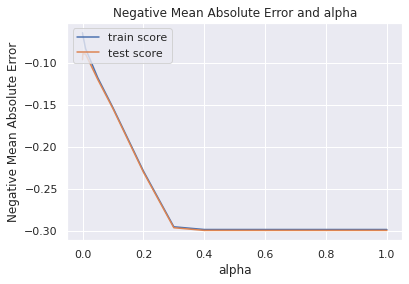

In [506]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

observation:From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [507]:
# At alpha = 0.001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00000000e+00,  6.92013431e-03,  1.85179373e-02,  6.52212484e-02,
        5.14969709e-02,  0.00000000e+00,  2.71813767e-02,  0.00000000e+00,
        4.40939835e-02,  0.00000000e+00,  0.00000000e+00,  4.87530682e-03,
        1.07039573e-01,  1.29806083e-02,  1.47208333e-04,  1.76375885e-02,
        1.51660860e-02,  3.18524919e-03, -1.03267091e-02,  7.89050016e-03,
        2.44724754e-02,  1.23048284e-02,  7.70065606e-03,  8.07272034e-03,
        1.47687950e-03,  1.26925250e-02,  4.13172521e-03, -5.77201010e-02,
        2.64700776e-02,  1.80329019e-02,  6.66787797e-02,  4.22415867e-02,
        3.74288866e-03,  3.38055379e-05,  4.19362311e-03,  2.07378309e-03,
       -2.90962408e-03,  1.53251994e-03,  5.65546440e-03, -3.12834868e-03,
       -2.83302142e-03, -6.24570378e-03, -0.00000000e+00, -7.93328387e-03,
        0.00000000e+00, -3.25199216e-03,  1.44585437e-02,  2.50193366e-03,
       -0.00000000e+00,  2.66879626e-02, -8.99769267e-03, -0.00000000e+00,
       -3.83847843e-03, -

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [508]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.995),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.007),
 ('LotArea', 0.019),
 ('OverallQual', 0.065),
 ('OverallCond', 0.051),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.027),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.107),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.018),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', 0.008),
 ('GarageArea', 0.024),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', 0.008),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.001),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.004),
 ('PropAge', -0.058),
 ('MSZoning_FV', 0.026),
 ('MSZoning_RH', 0.018),
 ('MSZoning_RL', 0.067),
 ('MSZoning_RM', 0.042),
 ('LotShape_IR2', 0.004),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', 0.004),
 ('LandContour_HLS', 0.002),
 ('LandContour_Low', -0.003),
 ('LandContour_Lvl', 0.002),
 ('LotConfig_CulDSac', 0.006),
 ('LotConfig_FR2', 

In [509]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9334254916467005
0.91556505238575


In [510]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 0.10382411760070273


the R2 value of train and test are good

In [511]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [512]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.995
1,MSSubClass,-0.000
2,LotFrontage,0.007
3,LotArea,0.019
4,OverallQual,0.065


In [513]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.995
13,GrLivArea,0.107
31,MSZoning_RL,0.067
4,OverallQual,0.065
5,OverallCond,0.051
...,...,...
140,BsmtQual_TA,-0.013
165,HeatingQC_TA,-0.014
139,BsmtQual_Gd,-0.015
173,KitchenQual_TA,-0.021


In [514]:
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.995
13,GrLivArea,0.107
31,MSZoning_RL,0.067
4,OverallQual,0.065
5,OverallCond,0.051
...,...,...
140,BsmtQual_TA,-0.013
165,HeatingQC_TA,-0.014
139,BsmtQual_Gd,-0.015
173,KitchenQual_TA,-0.021


In [515]:
pred.shape

(139, 2)

In [516]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 '3SsnPorch': 0.0014768795003270976,
 'BedroomAbvGr': 0.003185249188822964,
 'BldgType_2fmCon': 0.00021800589555129204,
 'BldgType_Duplex': -0.0,
 'BldgType_Twnhs': -0.009025277240255924,
 'BldgType_TwnhsE': -0.004879383560863089,
 'BsmtCond_Gd': 0.0022463239081468083,
 'BsmtCond_Po': -0.0,
 'BsmtCond_TA': 0.001957266290045174,
 'BsmtCond_none': 0.0,
 'BsmtExposure_Gd': 0.01181231875966861,
 'BsmtExposure_Mn': -0.0008457825380378959,
 'BsmtExposure_No': -0.0,
 'BsmtExposure_none': 0.0,
 'BsmtFinSF1': 0.02718137673140664,
 'BsmtFinSF2': 0.0,
 'BsmtFinType1_BLQ': -0.0007123735597151931,
 'BsmtFinType1_GLQ': 0.000801217823739392,
 'BsmtFinType1_LwQ': -0.004661624484588238,
 'BsmtFinType1_Rec': -0.001823700758197437,
 'BsmtFinType1_Unf': -0.0075621910998331645,
 'BsmtFinType1_none': 2.7412480634447753e-05,
 'BsmtFinType2_BLQ': -0.0045371872099473545,
 'BsmtFinType2_GLQ': 0.002797352421484452,
 'BsmtFinType2_LwQ': -0.0,
 'BsmtFinType2_Rec': -0.00217283380

In [517]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[pred]

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE

rfe = RFE(lm, step=16)            
rfe = rfe.fit(X_train, y_train)

In [518]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
9,GrLivArea,True,1,0.107040
23,MSZoning_RL,True,1,0.066679
1,OverallQual,True,1,0.065221
2,OverallCond,True,1,0.051497
5,TotalBsmtSF,True,1,0.044094
24,MSZoning_RM,True,1,0.042242
101,SaleType_New,True,1,0.030474
3,BsmtFinSF1,True,1,0.027181
30,Neighborhood_Crawfor,True,1,0.026688
21,MSZoning_FV,True,1,0.026470


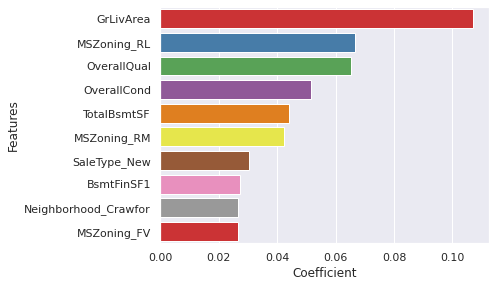

In [519]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

Ridge Regression

In [520]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [521]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008598,0.000711,0.004168,0.000103,0.0001,{'alpha': 0.0001},-0.093718,-0.099554,-0.111875,-0.086215,...,-0.098214,0.008424,27,-0.064331,-0.064556,-0.059534,-0.066803,-0.063563,-0.063757,0.002371
1,0.008621,0.000956,0.004281,0.000329,0.001,{'alpha': 0.001},-0.093717,-0.099553,-0.111873,-0.086213,...,-0.098213,0.008424,26,-0.064331,-0.064556,-0.059534,-0.066803,-0.063563,-0.063757,0.002371
2,0.010923,0.003479,0.005236,0.001829,0.01,{'alpha': 0.01},-0.093712,-0.099546,-0.111854,-0.086196,...,-0.098202,0.008423,25,-0.064332,-0.064556,-0.059535,-0.066804,-0.063565,-0.063758,0.002371
3,0.010643,0.004341,0.006220,0.002409,0.05,{'alpha': 0.05},-0.093689,-0.099516,-0.111768,-0.086124,...,-0.098153,0.008416,24,-0.064337,-0.064555,-0.059538,-0.066809,-0.063573,-0.063762,0.002371
4,0.010567,0.003737,0.004160,0.000053,0.1,{'alpha': 0.1},-0.093660,-0.099482,-0.111668,-0.086035,...,-0.098095,0.008410,23,-0.064342,-0.064554,-0.059543,-0.066816,-0.063583,-0.063767,0.002372


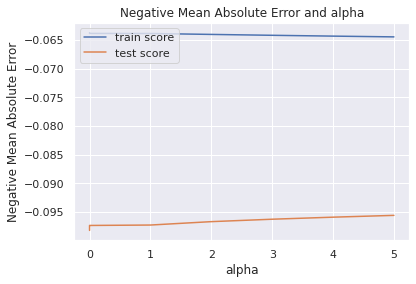

In [522]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [523]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.04948302e-03,  3.60392176e-03,  2.04196630e-02,  5.44193332e-02,
        5.00847020e-02, -4.73140229e-03,  2.73173417e-02,  5.39726569e-03,
        4.84991442e-02,  3.01158590e-02,  3.98066387e-02,  1.37139615e-02,
        5.92893520e-02,  1.32676089e-02,  2.30162536e-03,  1.96576417e-02,
        1.67604394e-02,  6.77433202e-03, -1.12041206e-02,  6.10866099e-03,
        2.43954363e-02,  1.38933811e-02,  8.04001478e-03,  9.88380771e-03,
        3.30636531e-03,  1.40017833e-02,  7.10892574e-03, -5.49239846e-02,
        7.07723583e-02,  4.08907437e-02,  1.49449465e-01,  1.16828776e-01,
        4.48252741e-03,  1.47428408e-03,  6.60380216e-03,  5.00908049e-03,
       -3.85014229e-03,  6.50500464e-03,  4.14187281e-03, -6.46586389e-03,
       -4.35298951e-03, -1.06058142e-02,  7.27518707e-04, -1.05718282e-02,
       -1.42676176e-03, -8.41382620e-03,  6.90779500e-03, -1.16539766e-03,
       -1.18363115e-02,  2.20361902e-02, -2.38093677e-02, -9.27383391e-03,
       -8.94386232e-03, -

In [524]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.996),
 ('MSSubClass', 0.001),
 ('LotFrontage', 0.004),
 ('LotArea', 0.02),
 ('OverallQual', 0.054),
 ('OverallCond', 0.05),
 ('MasVnrArea', -0.005),
 ('BsmtFinSF1', 0.027),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', 0.048),
 ('1stFlrSF', 0.03),
 ('2ndFlrSF', 0.04),
 ('LowQualFinSF', 0.014),
 ('GrLivArea', 0.059),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.02),
 ('HalfBath', 0.017),
 ('BedroomAbvGr', 0.007),
 ('KitchenAbvGr', -0.011),
 ('Fireplaces', 0.006),
 ('GarageArea', 0.024),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.008),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.007),
 ('PropAge', -0.055),
 ('MSZoning_FV', 0.071),
 ('MSZoning_RH', 0.041),
 ('MSZoning_RL', 0.149),
 ('MSZoning_RM', 0.117),
 ('LotShape_IR2', 0.004),
 ('LotShape_IR3', 0.001),
 ('LotShape_Reg', 0.007),
 ('LandContour_HLS', 0.005),
 ('LandContour_Low', -0.004),
 ('LandContour_Lvl', 0.007),
 ('LotConfig_CulDSac', 0.004),
 ('LotConf

In [525]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9379704943692685
0.9025994656876392


In [526]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11151102279767106


In [527]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.996
31,MSZoning_RL,0.149
32,MSZoning_RM,0.117
29,MSZoning_FV,0.071
13,GrLivArea,0.059
4,OverallQual,0.054
5,OverallCond,0.050
9,TotalBsmtSF,0.048
30,MSZoning_RH,0.041
11,2ndFlrSF,0.040


In [528]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.996
31,MSZoning_RL,0.149
32,MSZoning_RM,0.117
29,MSZoning_FV,0.071
13,GrLivArea,0.059
...,...,...
51,Neighborhood_Edwards,-0.024
105,Exterior1st_Wd Sdng,-0.025
172,KitchenQual_Gd,-0.025
173,KitchenQual_TA,-0.035


In [529]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train.columns))
ridge_coeff_dict

{'1stFlrSF': 0.03011585904840486,
 '2ndFlrSF': 0.039806638690048135,
 '3SsnPorch': 0.0033063653074900216,
 'BedroomAbvGr': 0.006774332018931162,
 'BldgType_2fmCon': 0.0018473411819221268,
 'BldgType_Duplex': -0.0041765537979278145,
 'BldgType_Twnhs': -0.011949655444427885,
 'BldgType_TwnhsE': -0.009943815062722126,
 'BsmtCond_Gd': 0.007190233160609342,
 'BsmtCond_Po': -0.001279742766347954,
 'BsmtCond_TA': 0.007277767934208822,
 'BsmtCond_none': 0.0017511667988383518,
 'BsmtExposure_Gd': 0.011830234695814455,
 'BsmtExposure_Mn': -0.0011541083057350348,
 'BsmtExposure_No': 7.124159332709535e-05,
 'BsmtExposure_none': 0.0017286259231677299,
 'BsmtFinSF1': 0.027317341677089112,
 'BsmtFinSF2': 0.005397265686303552,
 'BsmtFinType1_BLQ': -0.0029690981886001493,
 'BsmtFinType1_GLQ': 0.00012881306385203667,
 'BsmtFinType1_LwQ': -0.009019891410921207,
 'BsmtFinType1_Rec': -0.0035880109057327358,
 'BsmtFinType1_Unf': -0.008698795504536389,
 'BsmtFinType1_none': 0.0017511667988418635,
 'BsmtFinTy

In [530]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
23,MSZoning_RL,True,1,0.149449
24,MSZoning_RM,True,1,0.116829
21,MSZoning_FV,True,1,0.070772
9,GrLivArea,True,1,0.059289
1,OverallQual,True,1,0.054419
2,OverallCond,True,1,0.050085
5,TotalBsmtSF,True,1,0.048499
22,MSZoning_RH,True,1,0.040891
7,2ndFlrSF,True,1,0.039807
6,1stFlrSF,True,1,0.030116


Observation:
1. R2 score <br>
  -Ridge is better in terms of the R2 Score of test and train.
2. RMSE<br>
  -Lasso is better in terms of RMSE.<br>
  
Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the  bar chart as significant variables for predicting the price of a house.

- GrLivArea	
- OverallQual	
-	OverallCond	
- TotalBsmtSF	
- GarageArea	
- BsmtFinSF1
- SaleType_New	
- Foundation_PConc	
- CentralAir_Y

